In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from utils import load_dataset

%matplotlib inline
%load_ext autoreload
%autoreload 2

![alt text](<Theory/Problem set.png>)

LOADING THE DATASET

In [2]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


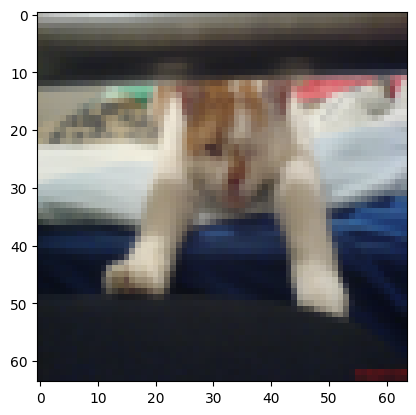

In [3]:
# Example of a picture
index = 29
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

![alt text](<Theory/Screenshot 2024-08-07 181533.png>)

In [4]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


![alt text](<Theory/Flatten the data.png>)

In [5]:
# Reshape the training and test examples

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Check that the first 10 pixels of the second image are in the correct place
#assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213]), "Wrong solution. Use (X.shape[0], -1).T."
#assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159]), "Wrong solution. Use (X.shape[0], -1).T."

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


STANDARZIE THE DATA

In [6]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

![alt text](<Theory/General Architecture.png>)

![alt text](<Theory/Main steps.png>)

In [7]:
#Sigmoid

def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [8]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

sigmoid([0, 2]) = [0.5        0.88079708]
[0.62245933 0.5        0.88079708]


INITIALIZING PARAMETERS WITH ZEROS

In [9]:
def initialize_with_zeros(dim):
    
    w = np.zeros((dim,1))
    b = 0.0

    return w, b

In [10]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0


![alt text](<Theory/Forward prop and back porp.png>)

In [11]:
def propagate(w, b, X, Y):
    m = X.shape[1]

    #Forward prop
    A = sigmoid(np.dot(w.T,X)+b)
    cost = -1 * np.sum((Y*np.log(A)+(1-Y)*np.log(1-A))/m)

    #Back prop
    dw = np.dot(X, (A-Y).T)/m
    db = np.sum(A-Y)/m

    cost = np.squeeze(np.array(cost))
   
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [12]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.12500404500439652
cost = 0.15900537707692405


![alt text](Theory/Optimize.png)

In [13]:
def optimize(w, b, X, Y, num_iterations = 100, learning_rate = 100, print_cost = False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []

    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate*dw
        b = b - learning_rate*db

        #Record the cost
        if i % 100 == 0:
            costs.append(cost)
            #Print the cost every 1000 iteraitons 
            if print_cost:
                print("Cost after iteration %i:%f" %(i, cost))

    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs           

In [14]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]


![alt text](Theory/Predict.png)

In [15]:
def predict(w, b ,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else :
            Y_prediction[0,i] = 0
    return Y_prediction
            

In [16]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


MERGING ALL FUNCTIONS TO A MODEL

In [17]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, cost = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d


In [18]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0:0.693147
Cost after iteration 100:0.584508
Cost after iteration 200:0.466949
Cost after iteration 300:0.376007
Cost after iteration 400:0.331463
Cost after iteration 500:0.303273
Cost after iteration 600:0.279880
Cost after iteration 700:0.260042
Cost after iteration 800:0.242941
Cost after iteration 900:0.228004
Cost after iteration 1000:0.214820
Cost after iteration 1100:0.203078
Cost after iteration 1200:0.192544
Cost after iteration 1300:0.183033
Cost after iteration 1400:0.174399
Cost after iteration 1500:0.166521
Cost after iteration 1600:0.159305
Cost after iteration 1700:0.152667
Cost after iteration 1800:0.146542
Cost after iteration 1900:0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "cat" picture.


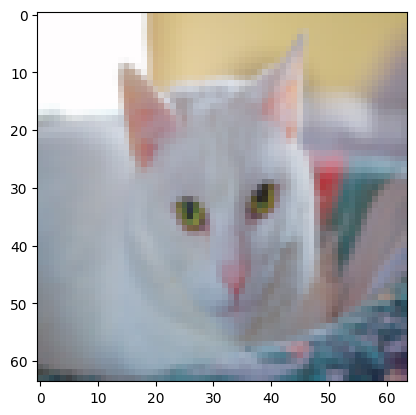

In [19]:
# Example of a picture that was wrongly classified.
index = 2
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

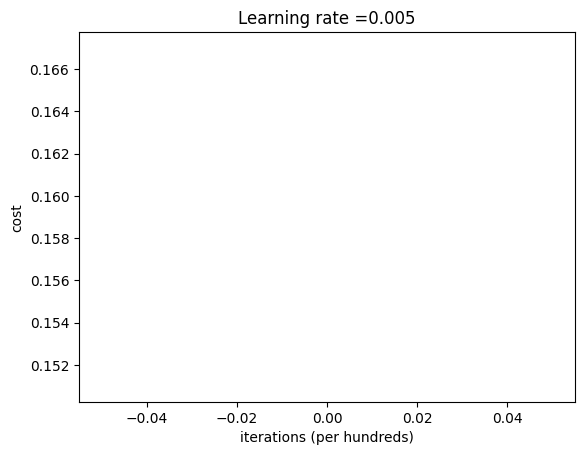

In [20]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()